
<h1 style="color: Purple; font-size: 26px;border-bottom: 2px solid gray;padding: 10px; text-align: center;">Provide Insights to Chief of Operations in Transportation Domain</h1>


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Importing Libraries
</h2>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Importing Datasets
</h2>


In [3]:
df_dim_city=pd.read_csv("dim_city.csv")
df_dim_date=pd.read_csv("dim_date.csv")
df_dim_repeat_trip_distribution=pd.read_csv("dim_repeat_trip_distribution.csv")
df_city_target_passenger_rating=pd.read_csv("city_target_passenger_rating.csv")
df_fact_passenger_summary=pd.read_csv("fact_passenger_summary.csv")
df_fact_trips=pd.read_csv("fact_trips.csv")
df_monthly_target_new_passengers=pd.read_csv("monthly_target_new_passengers.csv")
df_monthly_target_trips=pd.read_csv("monthly_target_trips.csv")


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Data Exploration
</h2>


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    1) Data Exploration of df_dim_city
</h2>


In [4]:
df_dim_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city_id    10 non-null     object
 1   city_name  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [5]:
df_dim_city.describe(include=object)

,city_id,city_name
count,10,10
unique,10,10
top,RJ01,Jaipur
freq,1,1


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    2) Data Exploration of df_dim_date
</h2>


In [6]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            182 non-null    object
 1   start_of_month  182 non-null    object
 2   month_name      182 non-null    object
 3   day_type        182 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


In [7]:
df_dim_date.head(5)

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday
2,2024-01-03,2024-01-01,January,Weekday
3,2024-01-04,2024-01-01,January,Weekday
4,2024-01-05,2024-01-01,January,Weekday


In [8]:
df_dim_date.describe(include=object)

,date,start_of_month,month_name,day_type
count,182,182,182,182
unique,182,6,6,2
top,2024-01-01,2024-01-01,January,Weekday
freq,1,31,31,130


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    3) df_dim_repeat_trip_distribution
</h2>


In [9]:
df_dim_repeat_trip_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   540 non-null    object
 1   city_id                 540 non-null    object
 2   trip_count              540 non-null    object
 3   repeat_passenger_count  540 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 17.0+ KB


In [10]:
df_dim_repeat_trip_distribution.describe()

,repeat_passenger_count
count,540.000000
mean,113.538889
std,142.912834
min,0.000000
25%,20.000000
50%,63.500000
75%,157.250000
max,999.000000


In [11]:
#Since max=999 is far ahead of mean and even does not come under 3 standard deviation
# so anlayzing the max =999 value

In [12]:
#Getting the city very max value is coming
df_dim_repeat_trip_distribution[df_dim_repeat_trip_distribution.repeat_passenger_count==999]

,month,city_id,trip_count,repeat_passenger_count
154,2024-02-01,RJ01,2-Trips,999


In [13]:
#Analyzing the data of Rajasthan,that is where max value is coming
df_dim_repeat_trip_distribution[df_dim_repeat_trip_distribution.city_id=="RJ01"].describe()

,repeat_passenger_count
count,54.000000
mean,179.296296
std,256.980627
min,10.000000
25%,25.000000
50%,62.500000
75%,217.500000
max,999.000000


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    4) df_city_target_passenger_rating
</h2>


In [14]:
df_city_target_passenger_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city_id                      10 non-null     object 
 1   target_avg_passenger_rating  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [15]:
df_city_target_passenger_rating.head(3)

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    5) df_fact_passenger_summary
</h2>


In [16]:
df_fact_passenger_summary.head(3)

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616


In [17]:
df_fact_passenger_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              60 non-null     object
 1   city_id            60 non-null     object
 2   new_passengers     60 non-null     int64 
 3   repeat_passengers  60 non-null     int64 
 4   total_passengers   60 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [18]:
df_fact_passenger_summary.describe()

,new_passengers,repeat_passengers,total_passengers
count,60.000000,60.000000,60.000000
mean,2949.966667,1021.850000,3971.816667
std,1960.397676,489.245833,2233.462741
min,1039.000000,172.000000,1543.000000
25%,1844.500000,689.750000,2516.250000
50%,2212.000000,980.500000,3417.000000
75%,3287.250000,1491.000000,4675.250000
max,10789.000000,1853.000000,12450.000000


In [19]:
df_fact_passenger_summary[df_fact_passenger_summary.new_passengers==10789]

,month,city_id,new_passengers,repeat_passengers,total_passengers
17,2024-02-01,RJ01,10789,1661,12450


In [20]:
df_fact_passenger_summary[df_fact_passenger_summary.city_id=="RJ01"].describe()

,new_passengers,repeat_passengers,total_passengers
count,6.000000,6.000000,6.000000
mean,7642.666667,1613.666667,9256.333333
std,2401.102469,262.490127,2387.018279
min,5332.000000,1181.000000,6956.000000
25%,5861.250000,1481.750000,7344.500000
50%,6768.500000,1698.500000,8556.500000
75%,9671.500000,1814.000000,11198.000000
max,10789.000000,1842.000000,12450.000000


In [21]:
df_fact_passenger_summary.shape

(60, 5)

<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    6) df_fact_trips
</h2>


In [22]:
df_fact_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 26.0+ MB


In [23]:
df_fact_trips.describe()

,distance_travelled(km),fare_amount,passenger_rating,driver_rating
count,425903.000000,425903.000000,425903.00000,425903.000000
mean,19.127172,254.020495,7.66104,7.830947
std,9.491735,159.638784,1.45533,1.442553
min,5.000000,58.000000,1.00000,1.000000
25%,12.000000,135.000000,7.00000,7.000000
50%,17.000000,199.000000,8.00000,8.000000
75%,25.000000,337.000000,9.00000,9.000000
max,45.000000,802.000000,10.00000,10.000000


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    7) df_monthly_target_new_passengers
</h2>


In [24]:
df_monthly_target_new_passengers.head(3)

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000


In [25]:
df_monthly_target_new_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   month                  60 non-null     object
 1   city_id                60 non-null     object
 2   target_new_passengers  60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [26]:
df_monthly_target_new_passengers.describe()

,target_new_passengers
count,60.000000
mean,3085.000000
std,2412.104012
min,1000.000000
25%,1950.000000
50%,2000.000000
75%,3400.000000
max,12000.000000


<h2 style="color: Black; font-family: Arial; font-size: 17px; border-bottom: 2px solid gray; padding: 10px;">
    8) df_monthly_target_trips
</h2>


In [27]:
df_monthly_target_trips.head(3)

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000


In [28]:
df_monthly_target_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               60 non-null     object
 1   city_id             60 non-null     object
 2   total_target_trips  60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [29]:
df_monthly_target_trips.describe()

,total_target_trips
count,60.000000
mean,7150.000000
std,3137.120563
min,2000.000000
25%,4875.000000
50%,7000.000000
75%,9125.000000
max,13000.000000


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Data Analysis
</h2>


**Q-1) Identify the top 3 and bottom 3 cities by total trips over the entire analysis
period.**

In [30]:
df_fact_group=df_fact_trips.groupby("city_id")
df_fact_group_=[]
for city_id,j in df_fact_group:
    count_=j["trip_id"].count()
    df_fact_group_.append((city_id,count_))

result_1=pd.DataFrame(df_fact_group_,columns=["city_id","total_trips"])
result_1_merge=pd.merge(result_1,df_dim_city,on='city_id',how='left')[["city_name","total_trips"]]
result_1_top_3=result_1_merge.sort_values(by="total_trips",ascending=False).head(3)
result_1_top_3.reset_index(drop=True).rename(columns={"total_trips":"Higest trips"})

,city_name,Higest trips
0,Jaipur,76888
1,Lucknow,64299
2,Surat,54843


**Bottom 3**

In [31]:
result_1_bottom_3=result_1_merge.sort_values(by="total_trips",ascending=True).head(3)
result_1_bottom_3.reset_index(drop=True).rename(columns={"total_trips":"Lowest_trips"})

,city_name,Lowest_trips
0,Mysore,16238
1,Coimbatore,21104
2,Visakhapatnam,28366


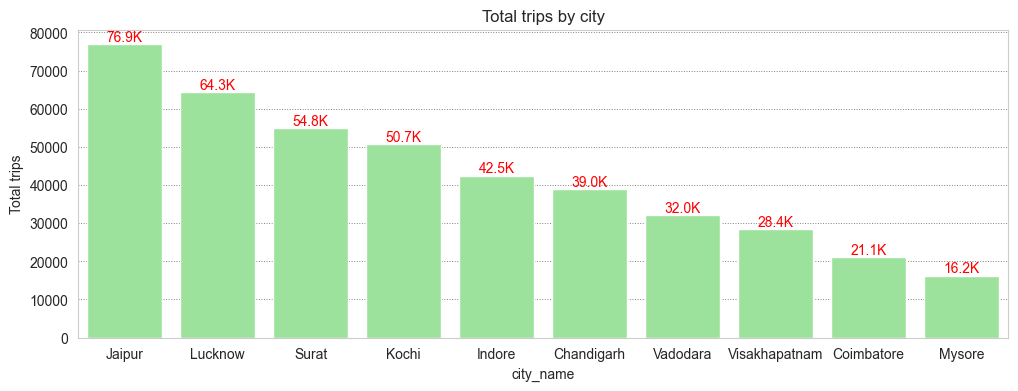

In [65]:
def format_no(number):
    return f'{number/1_000:.1f}K'
data_plot_1=result_1_merge.sort_values(by='total_trips',ascending=False)

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')   #set background white
plt.grid(True,linestyle=':',color='grey',linewidth=0.7)
plt.title('Total trips by city')
ax=sns.barplot(data=data_plot_1,x='city_name',y='total_trips',color='#90EE90')

for x in ax.containers:
    ax.bar_label(x,labels=[format_no(i) for i in x.datavalues],color='red')

plt.ylabel('Total trips')
plt.show()
    

**Q-2)Calculate the average fare per trip for each city and compare it with the city’s average trip distance. Identify the cities with the highest and lowest average fare per trip to assess pricing efficiency across locations.**

In [120]:
df_2=df_fact_trips.groupby("city_id")
list_2=[]
for city_id,j in df_2:
    count_2_a=round((j["distance_travelled(km)"].mean()),2)
    count_2_b=round((j["fare_amount"].mean()),2)
    list_2.append((city_id,count_2_a,count_2_b,round((count_2_b/count_2_a),2)))

result_2=pd.DataFrame(list_2,\
           columns=["city_id","average_distance_per_trip(x)","average_fare_per_trip(y)","fare_per_unit_distance(y/x)"])

result_2_=pd.merge(result_2,df_dim_city,on="city_id",how='left')\
              [["city_name","average_distance_per_trip(x)","average_fare_per_trip(y)","fare_per_unit_distance(y/x)"]]


In [121]:
result_2_

,city_name,average_distance_per_trip(x),average_fare_per_trip(y),fare_per_unit_distance(y/x)
0,Visakhapatnam,22.55,282.67,12.54
1,Chandigarh,23.52,283.69,12.06
2,Surat,11.00,117.27,10.66
3,Vadodara,11.52,118.57,10.29
4,Mysore,16.50,249.71,15.13
5,Kochi,24.07,335.25,13.93
6,Indore,16.50,179.84,10.90
7,Jaipur,30.02,483.92,16.12
8,Coimbatore,14.98,166.98,11.15
9,Lucknow,12.51,147.18,11.76


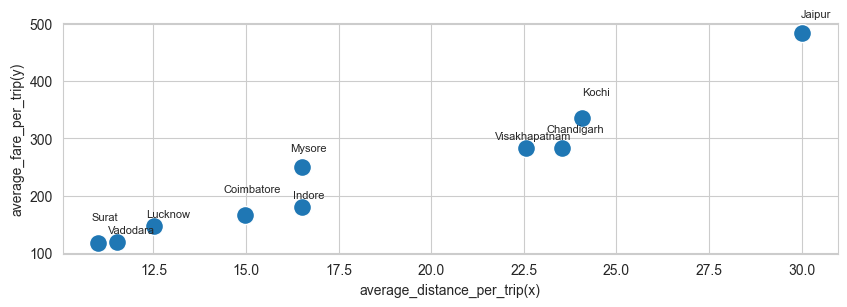

In [35]:
plt.figure(figsize=(10,3))
ax_2=sns.scatterplot(data=result_2_,x='average_distance_per_trip(x)',y='average_fare_per_trip(y)',s=170)

for i,row in result_2_.iterrows():
    ax_2.annotate(row['city_name'],(row['average_distance_per_trip(x)'],row['average_fare_per_trip(y)']),
                  textcoords="offset points",xytext=(5+(i%2)*5,5+(i%3)*5),ha='center',va='bottom',fontsize=8)

#xytext=(5+(i%2)*5,5+(i%3)*5),here i am adjusting the text position so that the text do not overlap

**Q-3) Calculate the average passenger and driver ratings for each city, segmented by passenger type (new vs. repeat). Identify cities with the highest and lowest average ratings.**

In [122]:
df_3=df_fact_trips.groupby(['city_id','passenger_type'])
list_3=[]
for (city_id,passenger_type),j in df_3:
    list_3.append((city_id,passenger_type,round((j['passenger_rating'].mean()),2),round((j['driver_rating'].mean()),2)))

df_3_result=pd.DataFrame(list_3,columns=['city_id','passenger_type','mean_passenger_rating','mean_driver_rating'])

df_3_result_merge=pd.merge\
         (df_3_result,df_dim_city,on="city_id",how='left')\
                      [['city_name','passenger_type','mean_passenger_rating','mean_driver_rating']]

In [123]:
df_3_new=df_3_result_merge[df_3_result_merge['passenger_type']=="new"]\
          .rename\
             (columns=\
              {'mean_passenger_rating':'mean_new_passenger_rating','mean_driver_rating':'mean_new_driver_rating'})\
                                                                                       .reset_index(drop=True)
df_3_new

,city_name,passenger_type,mean_new_passenger_rating,mean_new_driver_rating
0,Visakhapatnam,new,8.98,8.98
1,Chandigarh,new,8.49,7.99
2,Surat,new,7.98,6.99
3,Vadodara,new,7.98,7.00
4,Mysore,new,8.98,8.98
5,Kochi,new,8.99,8.99
6,Indore,new,8.49,7.97
7,Jaipur,new,8.99,8.99
8,Coimbatore,new,8.49,7.99
9,Lucknow,new,7.98,6.99


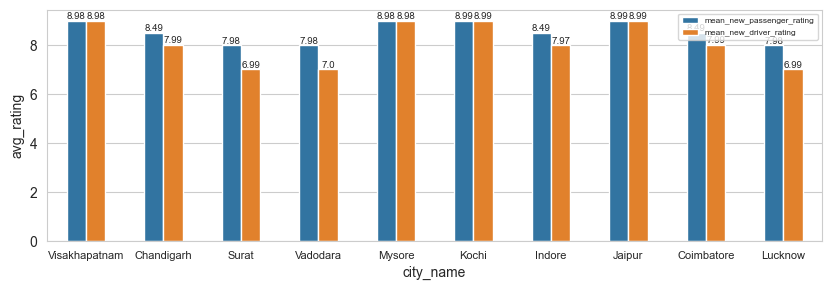

In [38]:
df_3_new_melt=pd.melt(df_3_new,
                            id_vars=['city_name'],
                            value_vars=['mean_new_passenger_rating','mean_new_driver_rating'],
                            var_name='passenger_driver',value_name='avg_rating')

plt.figure(figsize=(10,3))
ax_3_2=sns.barplot(data=df_3_new_melt,x='city_name',y='avg_rating',hue='passenger_driver',width=0.5)

for d in ax_3_2.containers:
    ax_3_2.bar_label(d,labels=d.datavalues,fontsize=7)
plt.legend(loc='upper right',prop={'size':6})
plt.xticks(fontsize=8)
plt.show()



In [39]:
df_3_repeated=df_3_result_merge[df_3_result_merge['passenger_type']=="repeated"].rename(columns={'mean_passenger_rating':'mean_repeated_passenger_rating','mean_driver_rating':'mean_repeated_driver_rating'}).reset_index(drop=True)
df_3_repeated

,city_name,passenger_type,mean_repeated_passenger_rating,mean_repeated_driver_rating
0,Visakhapatnam,repeated,7.99,8.99
1,Chandigarh,repeated,7.49,7.47
2,Surat,repeated,6.00,6.48
3,Vadodara,repeated,5.98,6.48
4,Mysore,repeated,7.98,8.97
5,Kochi,repeated,8.00,8.99
6,Indore,repeated,7.47,7.48
7,Jaipur,repeated,7.99,8.98
8,Coimbatore,repeated,7.48,7.48
9,Lucknow,repeated,5.99,6.49


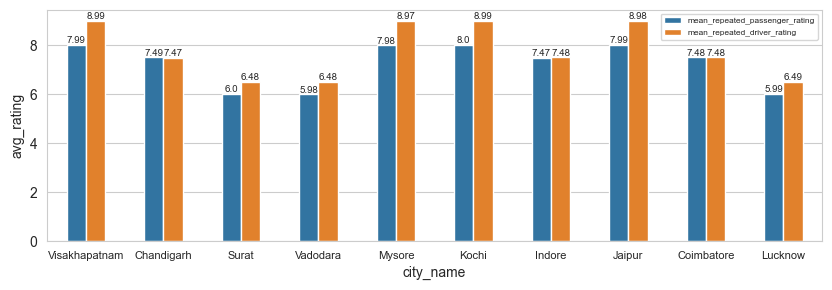

In [40]:
df_3_repeated_melt=pd.melt(df_3_repeated,
                            id_vars=['city_name'],
                            value_vars=['mean_repeated_passenger_rating','mean_repeated_driver_rating'],
                            var_name='passenger_driver',value_name='avg_rating')

plt.figure(figsize=(10,3))
ax_3_1=sns.barplot(data=df_3_repeated_melt,x='city_name',y='avg_rating',hue='passenger_driver',width=0.5)

for d in ax_3_1.containers:
    ax_3_1.bar_label(d,labels=d.datavalues,fontsize=7)
plt.legend(loc='upper right',prop={'size':6})
plt.xticks(fontsize=8)
plt.show()



**Q-4)For each city, identify the month with the highest total trips (peak demand) and the month with the lowest total trips (low demand). This analysis will help Goodcabs understand seasonal patterns and adjust resources accordingly.**

In [41]:
df_fact_trips['month_']=pd.to_datetime(df_fact_trips['date']).dt.strftime('%B')
list_4=[]
list_4_a=[]
df_4=df_fact_trips.groupby(['city_id','month_'])

for (city_id,month_),j in df_4:
    count_trip=j['trip_id'].count()
    list_4.append((city_id,month_,count_trip))
df_4_=pd.DataFrame(list_4,columns=['city_id','month_','total_trips']) 
df_4_a=df_4_.groupby('city_id')
for city_id,j in df_4_a:
    max_=j['total_trips'].max()
    min_=j['total_trips'].min()
    highest_month=j[j['total_trips']==max_].iloc[0]['month_']
    lowest_month=j[j['total_trips']==min_].iloc[0]['month_']
    max_total_trips_=j[j['total_trips']==max_].iloc[0]['total_trips']
    min_total_trips=j[j['total_trips']==min_].iloc[0]['total_trips']
    list_4_a.append((city_id,highest_month,max_total_trips_,lowest_month,min_total_trips))
df_4_max=pd.DataFrame(list_4_a,columns=['city_id','max_trip_month','max_total_trips','min_trip_month','min_total_trips'])   

df_4_max_min=pd.merge(df_4_max,df_dim_city,on="city_id",how='left')[['city_name','max_trip_month','max_total_trips','min_trip_month','min_total_trips']]


In [42]:
df_4_max_min

,city_name,max_trip_month,max_total_trips,min_trip_month,min_total_trips
0,Visakhapatnam,April,4938,January,4468
1,Chandigarh,February,7387,April,5566
2,Surat,April,9831,January,8358
3,Vadodara,April,5941,June,4685
4,Mysore,May,3007,January,2485
5,Kochi,May,10014,June,6399
6,Indore,May,7787,June,6288
7,Jaipur,February,15872,June,9842
8,Coimbatore,March,3680,June,3158
9,Lucknow,February,12060,May,9705


**Q-5)Compare the total trips taken on weekdays versus weekends for each city over the six-month period. Identify cities with a strong preference for either weekend or weekday trips to understand demand variations.**

In [43]:
df_fact_trips['weekday_no']=pd.to_datetime(df_fact_trips['date']).dt.weekday

In [124]:
list_5=[]
for city_id,j in df_fact_trips.groupby('city_id'):
    x_weekdays=j[j['weekday_no']<5]['trip_id'].count()
    x_weekends=j[j['weekday_no']>5]['trip_id'].count()
    min_date=(pd.to_datetime(j['date']).min()).strftime('%Y-%m-%d')##here i have not used dt because dt is required when there is a series object
    max_date=(pd.to_datetime(j['date']).max()).strftime('%Y-%m-%d')## and to access datetime specific method we have to use .dt accessor
    total_days=len(j['date'].unique())
    total_weekday=np.busday_count(min_date,max_date)
    total_weekends_days=total_days-total_weekday

    list_5.append((city_id,round((x_weekdays*100/(x_weekdays+x_weekends)),2),round((x_weekdays/(total_weekday)),2),round((x_weekends*100/(x_weekdays+x_weekends)),2),round((x_weekends/total_weekends_days),2)))

df_5=pd.DataFrame\
     (list_5,columns=\
       ['city_id','%_trips_in_weekdays','avg_per_day_trip_weekdays','%_trips_in_weekends','avg_per_day_trip_weekend'])
df_5_merge=pd.merge(df_5,df_dim_city,on='city_id',how='left')\
      [['city_name','%_trips_in_weekdays','avg_per_day_trip_weekdays','%_trips_in_weekends','avg_per_day_trip_weekend']]

In [125]:
df_5_merge

,city_name,%_trips_in_weekdays,avg_per_day_trip_weekdays,%_trips_in_weekends,avg_per_day_trip_weekend
0,Visakhapatnam,69.78,116.15,30.22,125.77
1,Chandigarh,67.64,153.18,32.36,183.21
2,Surat,81.60,290.72,18.40,163.87
3,Vadodara,77.99,156.23,22.01,110.25
4,Mysore,56.44,49.42,43.56,95.33
5,Kochi,62.00,176.27,38.00,270.04
6,Indore,66.79,163.06,33.21,202.71
7,Jaipur,59.46,249.93,40.54,426.10
8,Coimbatore,74.65,96.74,25.35,82.12
9,Lucknow,87.10,381.67,12.90,141.33


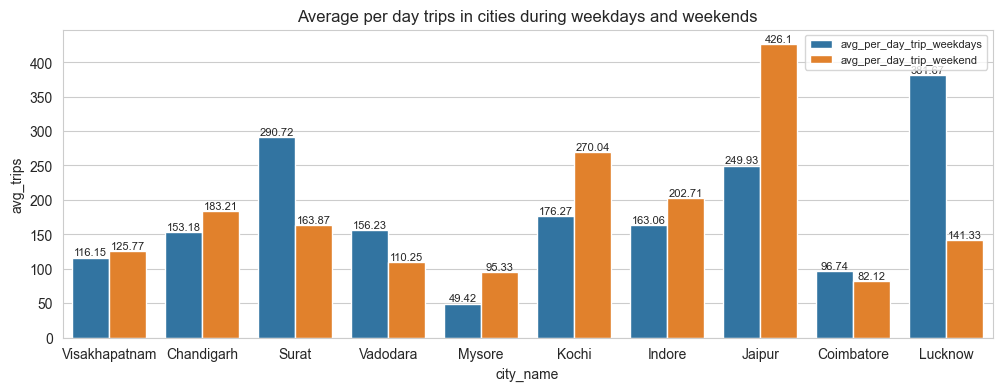

In [127]:
df_5_melted=\
           pd.melt\
               (df_5_merge,id_vars=['city_name'],value_vars=['avg_per_day_trip_weekdays','avg_per_day_trip_weekend'],
                    value_name="avg_trips",var_name='day_type')

plt.figure(figsize=(12,4))
plt.title("Average per day trips in cities during weekdays and weekends")
ax_5=sns.barplot(data=df_5_melted,x='city_name',y='avg_trips',hue='day_type')

for z in ax_5.containers:
    ax_5.bar_label(z,labels=z.datavalues,fontsize=8)

plt.legend(loc='upper right',prop={'size':8})
plt.show()


In [47]:
df_dim_repeat_trip_distribution.head(3)

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158


In [48]:
df_6=df_dim_repeat_trip_distribution.groupby('city_id')
list_6_=[]
for city_id,j in df_6:
    total_passenger_city=j['repeat_passenger_count'].sum()
    for trip_count,k in j.groupby("trip_count"):
        passenger_trip=k['repeat_passenger_count'].sum()
        percentage_=round((passenger_trip*100/total_passenger_city),2)
        list_6_.append((city_id,trip_count,percentage_))

df_6_trip=pd.DataFrame(list_6_,columns=['city_id','trip_count','percentage_'])
    


In [49]:
df_6_trip

,city_id,trip_count,percentage_
0,AP01,10-Trips,0.92
1,AP01,2-Trips,51.25
2,AP01,3-Trips,24.96
3,AP01,4-Trips,9.98
4,AP01,5-Trips,5.44
...,...,...,...
85,UP01,5-Trips,18.42
86,UP01,6-Trips,20.18
87,UP01,7-Trips,11.33
88,UP01,8-Trips,6.43


In [128]:
pivot_df=df_6_trip.pivot(index="city_id",columns="trip_count",values="percentage_")
pivot_df_merge=pd.merge\
       (pivot_df,df_dim_city,on='city_id')\
             [["city_name","2-Trips","3-Trips","4-Trips","5-Trips","6-Trips","7-Trips","8-Trips","9-Trips","10-Trips"]]
pivot_df_merge

,city_name,2-Trips,3-Trips,4-Trips,5-Trips,6-Trips,7-Trips,8-Trips,9-Trips,10-Trips
0,Visakhapatnam,51.25,24.96,9.98,5.44,3.19,1.98,1.39,0.88,0.92
1,Chandigarh,32.31,19.25,15.74,12.21,7.42,5.48,3.47,2.33,1.79
2,Surat,9.76,14.26,16.55,19.75,18.45,11.89,6.24,1.74,1.35
3,Vadodara,9.87,14.17,16.52,18.06,19.08,12.86,5.78,2.05,1.61
4,Mysore,48.75,24.44,12.73,5.82,4.06,1.76,1.42,0.54,0.47
5,Kochi,47.67,24.35,11.81,6.48,3.91,2.11,1.65,1.21,0.81
6,Indore,34.34,22.69,13.40,10.34,6.85,5.24,3.26,2.38,1.51
7,Jaipur,50.14,20.73,12.12,6.29,4.13,2.52,1.90,1.20,0.97
8,Coimbatore,11.21,14.82,15.56,20.62,17.64,10.47,6.15,2.31,1.22
9,Lucknow,9.66,14.77,16.20,18.42,20.18,11.33,6.43,1.91,1.10


**Q-7)For each city, evaluate monthly performance against targets for total trips, new passengers, and average passenger ratings from targets_db. Determine if each metric met, exceeded, or missed the target, and calculate the percentage difference. Identify any consistent patterns in target achievement, particularly across tourism versus business-focused cities.**

In [51]:
df_fact_trips.head(3)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,month_,weekday_no
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,January,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,January,0
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,January,6


In [52]:
list_7=[]
for (city_id,month),j in df_fact_trips.groupby(['city_id','month_']):
    total_trips=j["trip_id"].count()
    list_7.append((city_id,month,total_trips))

df_7=pd.DataFrame(list_7,columns=["city_id","month","total_trips"])
df_7.head(3)

,city_id,month,total_trips
0,AP01,April,4938
1,AP01,February,4793
2,AP01,January,4468


In [53]:
df_monthly_target_trips['month_']=pd.to_datetime(df_monthly_target_trips['month']).dt.strftime("%B")

In [54]:
df_target_real=pd.merge(df_7,df_monthly_target_trips,left_on=["city_id","month"],right_on=["city_id","month_"])

df_target_real=df_target_real[['city_id','month_','total_trips','total_target_trips']]

df_target_real['%_target_diff']=\
     round(\
    ((df_target_real['total_trips']-df_target_real['total_target_trips'])*100/df_target_real['total_target_trips']),2)

df_target_real=df_target_real[['city_id','month_','%_target_diff']]

df_city_target=pd.merge(df_target_real,df_dim_city,on='city_id')[['city_name','month_','%_target_diff']]
df_city_target.head(3)

,city_name,month_,%_target_diff
0,Visakhapatnam,April,-1.24
1,Visakhapatnam,February,6.51
2,Visakhapatnam,January,-0.71


In [129]:
df_city_target_trips_pivot=\
       df_city_target.pivot(index='city_name',columns='month_',values="%_target_diff")\
                                                           [['January','February','March','April','May','June']]

In [56]:
df_city_target_trips_pivot

month_,January,February,March,April,May,June
city_name,,,,,,
Chandigarh,-2.71,5.53,-6.16,-7.23,10.33,0.48
Coimbatore,4.31,-2.74,5.14,4.60,1.43,-9.77
Indore,-3.76,3.00,0.27,-1.13,3.83,-16.16
Jaipur,15.20,22.09,2.44,20.06,20.79,3.60
Kochi,-2.08,2.51,26.60,8.47,11.27,-28.90
Lucknow,-16.48,-7.23,-13.66,-7.16,-11.77,-6.91
Mysore,24.25,33.40,31.65,4.12,20.28,13.68
Surat,-7.13,0.77,2.97,-1.69,-2.26,-14.56
Vadodara,-20.42,-12.87,-6.70,-8.60,-10.78,-27.92


In [81]:
df_city_target_trips_pivot.style.applymap(lambda x: 'background-color: #FFA07A' if x<0 else "")\
    .format("{:.1f}").set_caption("% Difference of actual trips from the Target Trips")

#'\.format("{:.0f}")' : If i don't use it, extra zero will appear



month_,January,February,March,April,May,June
city_name,,,,,,
Chandigarh,-2.7,5.5,-6.2,-7.2,10.3,0.5
Coimbatore,4.3,-2.7,5.1,4.6,1.4,-9.8
Indore,-3.8,3.0,0.3,-1.1,3.8,-16.2
Jaipur,15.2,22.1,2.4,20.1,20.8,3.6
Kochi,-2.1,2.5,26.6,8.5,11.3,-28.9
Lucknow,-16.5,-7.2,-13.7,-7.2,-11.8,-6.9
Mysore,24.2,33.4,31.6,4.1,20.3,13.7
Surat,-7.1,0.8,3.0,-1.7,-2.3,-14.6
Vadodara,-20.4,-12.9,-6.7,-8.6,-10.8,-27.9


In [57]:
list_new_passenger=[]
df_new_passenger=df_fact_trips[df_fact_trips['passenger_type']=="new"]
for (city_id,month),j in df_new_passenger.groupby(['city_id','month_']):
    new_passenger_count=j['trip_id'].count()
    list_new_passenger.append((city_id,month,new_passenger_count))

df_new_=pd.DataFrame(list_new_passenger,columns=['city_id','month','new_passenger_count'])

    

In [135]:
df_monthly_target_new_passengers['month_']=pd.to_datetime(df_monthly_target_new_passengers['month']).dt.strftime("%B")

df_new_passenger_target=pd.merge(df_new_,df_monthly_target_new_passengers,left_on=['city_id','month'],right_on=['city_id','month_'])

df_new_passenger_target=df_new_passenger_target[['city_id','month_','new_passenger_count','target_new_passengers']]

df_new_passenger_target['%_new_passenger_target_diff']=\
round(
    (df_new_passenger_target['new_passenger_count']-df_new_passenger_target['target_new_passengers'])*100/(df_new_passenger_target['target_new_passengers']),2)

df_new_passenger_target=df_new_passenger_target[['city_id','month_','%_new_passenger_target_diff']]

df_new_passenger_target_=\
         pd.merge(df_new_passenger_target,df_dim_city,on='city_id')[['city_name','month_','%_new_passenger_target_diff']]

df_new_passenger_target_pivot=df_new_passenger_target_.pivot(index='city_name',columns='month_',values='%_new_passenger_target_diff')

df_new_passenger_target_pivot=df_new_passenger_target_pivot[['January','February','March','April','May','June']]

In [134]:
df_new_passenger_target_pivot
df_new_passenger_target_pivot.style.applymap(lambda x: 'background-color: #FFA07A' if x<0 else "")\
    .format("{:.1f}")\
    .set_caption("% Difference of new passenger from the Target new passenger")

#'\.format("{:.0f}")' : If i don't use it, extra zero will appear



month_,January,February,March,April,May,June
city_name,,,,,,
Chandigarh,-2.0,2.6,-19.3,-16.8,-9.0,-19.0
Coimbatore,21.5,9.8,2.5,24.2,3.9,22.6
Indore,5.3,6.6,1.6,17.6,1.4,1.1
Jaipur,-13.1,-10.1,-38.2,2.0,-11.1,-3.8
Kochi,-2.7,-12.7,-2.7,23.5,9.2,-24.7
Lucknow,8.3,10.3,-1.3,15.6,-8.8,-1.4
Mysore,-2.1,5.3,-0.7,-8.2,-4.0,-6.3
Surat,21.6,12.7,-2.7,22.9,7.4,2.7
Vadodara,16.1,19.2,-2.1,9.1,-7.5,-26.4


In [137]:
list_rating=[]
for city_id,j in df_fact_trips.groupby('city_id'):
    average_passenger_rating=round((j['passenger_rating'].mean()),2)
    list_rating.append((city_id,average_passenger_rating))

df_average_rating=pd.DataFrame(list_rating,columns=['city_id','average_passenger_rating'])

df_average_target_new=pd.merge(df_average_rating,df_city_target_passenger_rating,on='city_id')

df_average_target_new_=\
    pd.merge(df_average_target_new,df_dim_city,on="city_id")\
                                 [['city_name','average_passenger_rating','target_avg_passenger_rating']]

df_average_target_new_
    
    

,city_name,average_passenger_rating,target_avg_passenger_rating
0,Visakhapatnam,8.43,8.50
1,Chandigarh,7.98,8.00
2,Surat,6.42,7.00
3,Vadodara,6.61,7.50
4,Mysore,8.70,8.50
5,Kochi,8.52,8.50
6,Indore,7.83,8.00
7,Jaipur,8.58,8.25
8,Coimbatore,7.88,8.25
9,Lucknow,6.49,7.25


**Q-8)Analyse the Repeat Passenger Rate (RPR%)for each city across the six month period. Identify the top 2 and bottom 2 cities based on their RPR% to determine which locations have the strongest and weakest rates.**

In [62]:
list_8=[]
for (city_id,month_),j in df_fact_trips.groupby(['city_id','month_']):
    count_repeat_passenger=j[j['passenger_type']=="repeated"]['trip_id'].count()
    total_passenger=j['trip_id'].count()
    percent_repeat_passenger=round(((count_repeat_passenger*100)/total_passenger),2)
    list_8.append((city_id,month_,percent_repeat_passenger))

df_8=pd.DataFrame(list_8,columns=['city_id','month_','percent_repeat_passenger'])
df_8_pivot=df_8.pivot(index='city_id',columns='month_',values='percent_repeat_passenger')
df_8_=pd.merge(df_8_pivot,df_dim_city,on='city_id')[['city_name','January','February','March','April','May','June']]

**Repeat passenger Rate in cities month wise**

In [138]:
# if % difference greater than 50% then green
#if % difference less thatn 40% then yellow




df_8_.set_index('city_name'). style.applymap(lambda x: 'background-color: #90EE90' if x>50.00 else ('background-color: #FFD700' if x<40.00 else ""))\
    .format("{:.1f}")\
    .set_caption("Repeat passenger Rate in cities month wise")

                                     

,January,February,March,April,May,June
city_name,,,,,,
Visakhapatnam,43.8,50.3,55.5,62.6,59.7,57.6
Chandigarh,42.4,44.4,50.9,55.2,58.8,59.7
Surat,70.9,75.2,79.0,81.2,83.5,82.0
Vadodara,56.2,59.0,68.5,72.5,76.1,76.4
Mysore,21.2,21.0,24.6,29.5,36.1,34.1
Kochi,33.8,43.2,48.8,49.4,56.4,53.0
Indore,57.8,60.1,60.9,68.3,74.0,67.9
Jaipur,30.4,32.0,44.3,46.3,53.5,41.3
Coimbatore,50.1,51.6,58.2,66.1,70.7,61.2
